<a href="https://colab.research.google.com/github/IPMSand/AI-ML-Module/blob/main/ModelEvaluation_RSEM_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linkedinlearning : Nueral Network Ex

In [2]:
# import.
import tensorflow as tenserflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import keras


In [12]:
# import
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline


In [22]:
import numpy as np
from sklearn.metrics import mean_squared_error

In [3]:
# 1. Build the Model
model = Sequential()
model.add(Dense(4, activation = 'relu'))
model.add(Dense(3, activation = 'relu'))
model.add(Dense(1))

In [4]:
# 2. Compile the Model
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [5]:
# Dataset load
url = 'https://raw.githubusercontent.com/LinkedInLearning/artificial-intelligence-foundations-neural-networks-4381282/main/Advertising_2023.csv'
adverrising_df = pd.read_csv(url, index_col=0)

In [6]:
# data checks - 1
adverrising_df.head()

,digital,TV,radio,newspaper,sales
1,345.15,156.0,37.8,69.2,22.1
2,66.75,46.0,39.3,45.1,10.4
3,25.80,18.3,45.9,69.3,9.3
4,227.25,145.1,41.3,58.5,18.5
5,271.20,165.2,10.8,58.4,12.9


In [7]:
# data check - info()
# panda fuc to get consice summary of the dataframe
adverrising_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1199 entries, 1 to 1197
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   digital    1199 non-null   float64
 1   TV         1199 non-null   float64
 2   radio      1199 non-null   float64
 3   newspaper  1199 non-null   float64
 4   sales      1199 non-null   float64
dtypes: float64(5)
memory usage: 56.2 KB


In [8]:
# data check : describe()
## Get the summary of statistics of the data
adverrising_df.describe()

,digital,TV,radio,newspaper,sales
count,1199.000000,1199.00000,1199.000000,1199.000000,1199.000000
mean,135.472394,146.61985,23.240617,30.529942,14.005505
std,135.730821,85.61047,14.820827,21.712507,5.202804
min,0.300000,0.70000,0.000000,0.300000,1.600000
25%,24.250000,73.40000,9.950000,12.800000,10.300000
50%,64.650000,149.70000,22.500000,25.600000,12.900000
75%,256.950000,218.50000,36.500000,45.100000,17.400000
max,444.600000,296.40000,49.600000,114.000000,27.000000


In [9]:
# Data Check : .shape ## Here no bracketss
# Shape of the dataframe - 1199 rows, five coloums
adverrising_df.shape

(1199, 5)

In [10]:
## Data Check : .isnull()
## used to check and manage Null values in a data frame
adverrising_df.isnull().sum()

,0
digital,0
TV,0
radio,0
newspaper,0
sales,0


## Visualization

In [ ]:
# Visualize by using different types of heatMap and tabes

<Axes: >

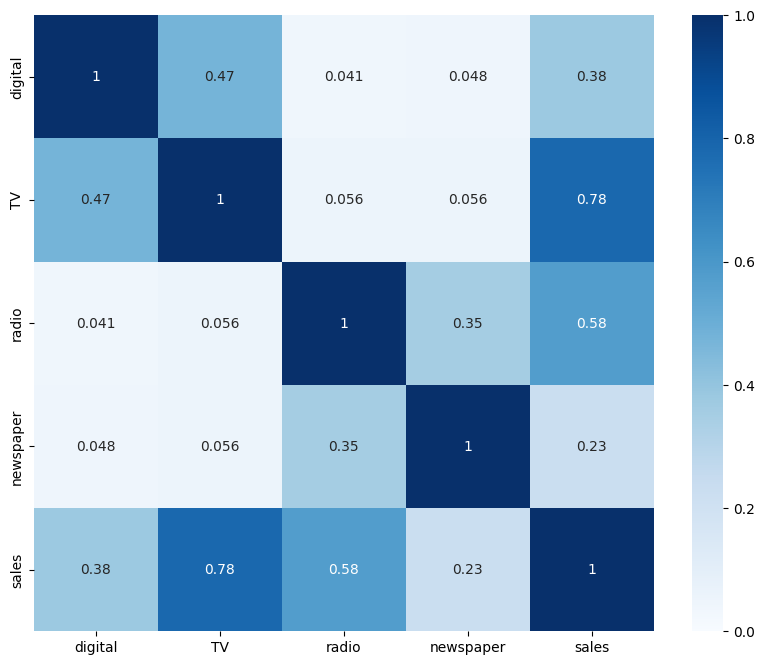

In [15]:
# plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(adverrising_df.corr(),annot=True,vmin = 0, vmax = 1, cmap = 'Blues')
# plt.show()

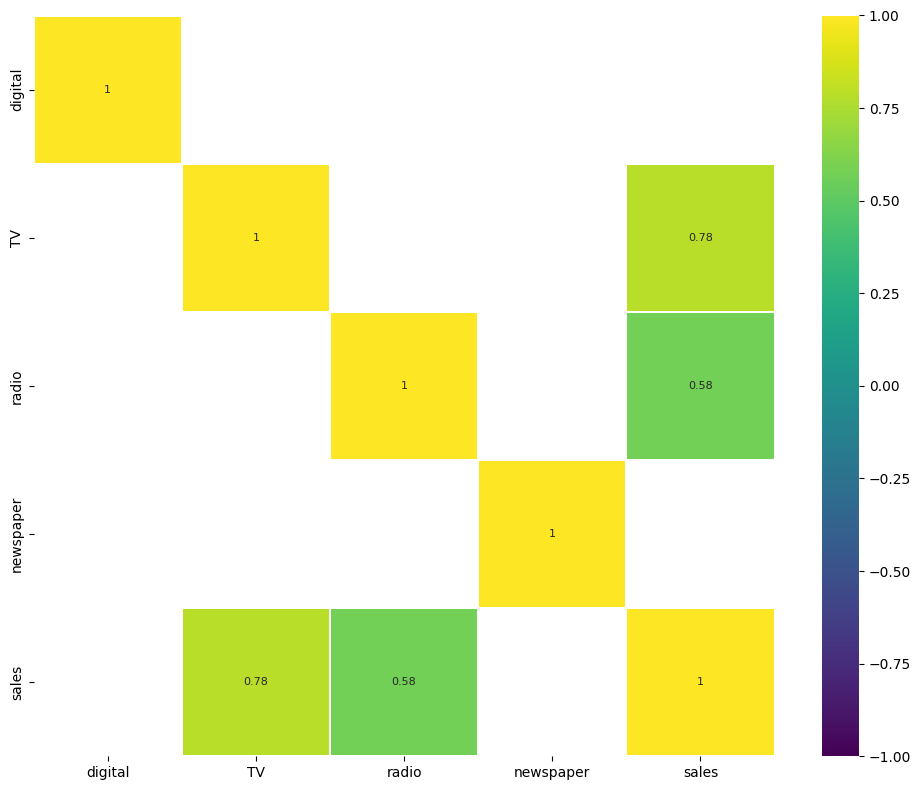

In [18]:
# Create Correlation matrix
corr = adverrising_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr[(corr >= 0.5) | ((corr <= -0.7))],
            cmap = 'viridis', vmax = 1.0, vmin = -1.0, linewidths = 0.1, annot=True, annot_kws={"size": 8}, square=True)
plt.tight_layout()
plt.show()

In [20]:
#
adverrising_df.corr()

,digital,TV,radio,newspaper,sales
digital,1.000000,0.474256,0.041316,0.048023,0.380101
TV,0.474256,1.000000,0.055697,0.055579,0.781824
radio,0.041316,0.055697,1.000000,0.353096,0.576528
newspaper,0.048023,0.055579,0.353096,1.000000,0.227039
sales,0.380101,0.781824,0.576528,0.227039,1.000000


In [27]:
#  mask for the upper triangle
mask = np.zeros_like(adverrising_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

<Axes: >

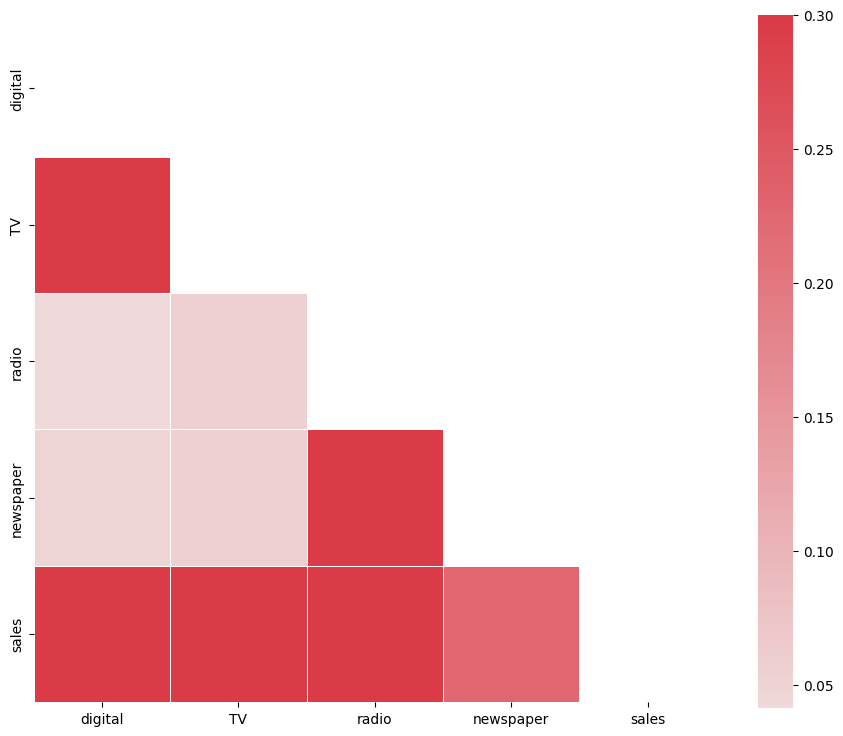

In [29]:
# set up the matplot lib figure
f, ax = plt.subplots(figsize=(11, 9))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatMap with the mask and correct aspect ratio
sns.heatmap(adverrising_df.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5,ax=ax)

## Data Preproccesing

In [ ]:
# Split Dataset into X(features/input) and Y(target/output)
X = adverrising_df[['digital', 'TV', 'radio', 'newspaper']]
Y = adverrising_df['sales']

In [ ]:
# Feature Normalization
normalized_feature = keras.utils.normalize(X.values) # import keras here
print(normalized_feature)

[[0.89211961 0.4032179  0.0977028  0.17886333]
 [0.66254734 0.45658693 0.39008405 0.44765371]
 [0.29009225 0.20576311 0.51609436 0.77920128]
 ...
 [0.06744611 0.99272247 0.05163843 0.08536149]
 [0.19480049 0.91868871 0.08898294 0.33188231]
 [0.06744611 0.99272247 0.05163843 0.08536149]]


In [ ]:
# split the Dataset
# impoert train_test_split from sklearn_medel_selection
from sklearn.model_selection import train_test_split


In [ ]:
# split the dataset
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)

In [ ]:
# print to evaluate to see how the data has been split into
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(719, 4) (480, 4) (719,) (480,)


## Visualize

In [ ]:
# import
# import matplotlib.pyplot as plt
# import seaborn as sns
# %matplotlib inline   up


In [ ]:
# 3. Fit the Model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=32)

Epoch 1/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 219.5192 - mse: 219.5192 - val_loss: 230.0018 - val_mse: 230.0018
Epoch 2/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 221.3544 - mse: 221.3544 - val_loss: 229.0102 - val_mse: 229.0102
Epoch 3/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 205.2950 - mse: 205.2950 - val_loss: 227.8180 - val_mse: 227.8180
Epoch 4/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 211.6383 - mse: 211.6383 - val_loss: 222.8296 - val_mse: 222.8296
Epoch 5/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 192.4484 - mse: 192.4484 - val_loss: 147.6051 - val_mse: 147.6051
Epoch 6/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 139.1119 - mse: 139.1119 - val_loss: 122.3052 - val_mse: 122.3052
Epoch 7/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 117.6207 - mse: 117.6207 - val_loss: 119.6376 - val_mse: 119.6376
Epoch 8/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 116.1024 - mse: 116.1024 - val_loss: 117.0574 - val_mse: 117.0574
Epoch 9

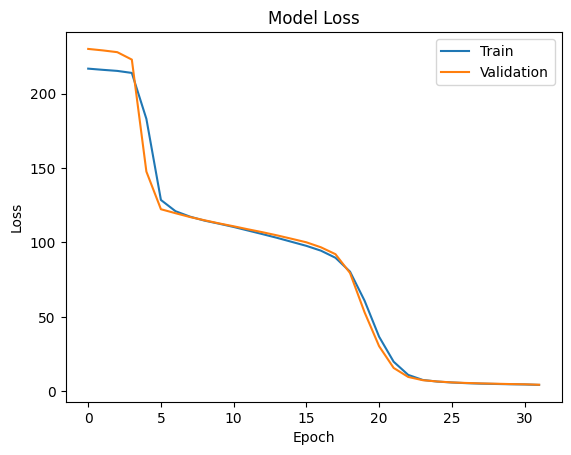

In [ ]:
# visualize
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

## Predict Sales

In [ ]:
test_predictions = model.predict(x_test).flatten()
print(test_predictions)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[25.94361   16.290396  16.985928  21.476162  16.875343  25.963438
 12.588724  19.492933  17.847683  12.936186   6.320956  17.592234
  5.8035426  7.8577285 12.770032   7.739275  22.186653  15.731284
  2.9120045 17.524464  23.072044   6.1739473 11.804301  12.628625
  8.002344   3.3763967 14.78438   15.868636  13.028547  10.560637
 14.886648  13.526177  19.59985   14.117698  16.827902   8.636649
 24.799639  16.037565  12.170506  15.847724  15.815516  12.146777
  7.5563145 15.496372  14.902632  13.996897   6.489345  24.799639
 14.73876    9.039313   9.145312  12.770032  11.458939  17.294052
  3.8368852 19.052065  16.210804  22.70895    8.637623  14.352001
 12.197769  12.026717  11.912461  14.7120075  8.286825  12.405838
  9.798053  21.783302   6.446319  22.85768    6.381321  23.316162
  7.920865  20.249321  13.953586  15.764233  16.525295  12.971396
 13.526178  21.047005  14.684048  20.096167  18.080835  18.312641
 16.304796  17.654938  11.982934  10

In [ ]:
true_predicted = pd.DataFrame(list(zip(y_test, test_predictions)), columns=['True', 'Predicted Values Y^'])
true_predicted.head(10)

,True,Predicted Values Y^
0,26.2,25.943609
1,19.0,16.290396
2,12.8,16.985928
3,20.8,21.476162
4,16.9,16.875343
5,23.8,25.963438
6,9.3,12.588724
7,22.6,19.492933
8,18.9,17.847683
9,14.9,12.936186


## above can be visualize into correlation

## Model Evaluation

In [ ]:
# import
# import numpy as np
# from sklearn.metrics import mean_squared_error

In [ ]:
pred_train = model.predict(x_train)
tr = np.sqrt(mean_squared_error(y_train, pred_train))
print(tr)
pred_test = model.predict(x_test)
te = np.sqrt(mean_squared_error(y_test, pred_test))
print(te)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2.0513997929739887
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2.096028138320134


In [ ]:
# Differece of Error between predicted value and actual value
diff = abs(te-tr)
print(diff)

0.04462834534614535
